In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

<Axes: xlabel='x1', ylabel='x2'>

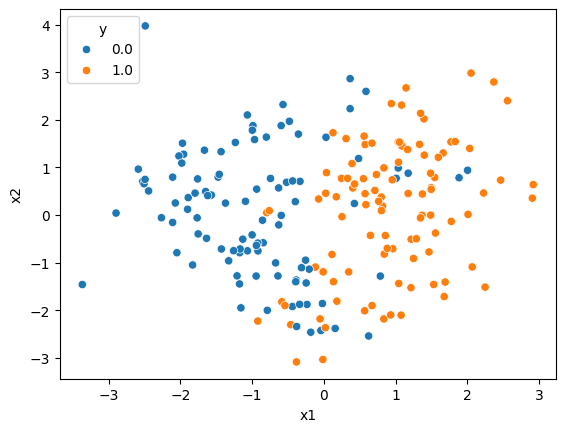

In [ ]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue=data['y'])

__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [3]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [6]:
print(tree_model.score(X_train, y_train), tree_model.score(X_test, y_test))

1.0 0.8


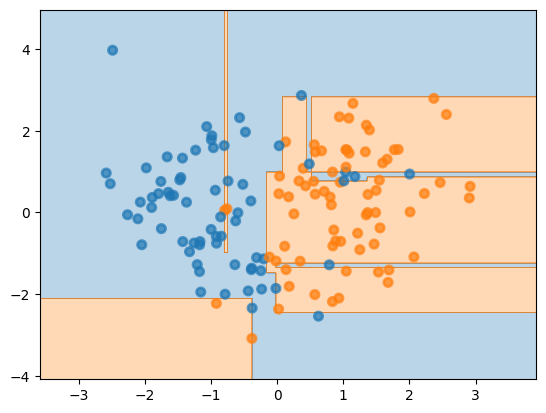

In [7]:
plot_surface(tree_model, X_train, y_train)

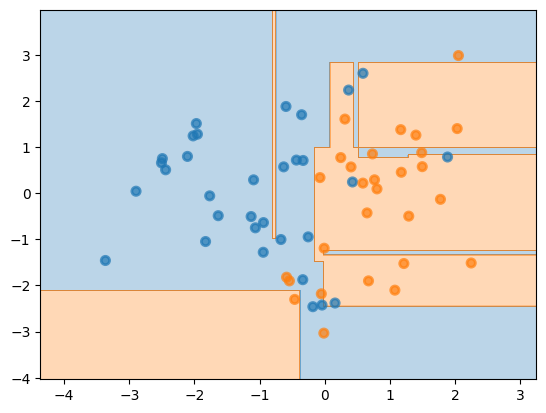

In [ ]:
plot_surface(tree_model, X_test, y_test)

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [31]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc, depth, leaf):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)


    ax.set_title(f'max_depth={depth}, min_samples_leaf={leaf}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)

    ax.legend(loc = 'lower right', prop={'size': 10})

In [19]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state = 42)

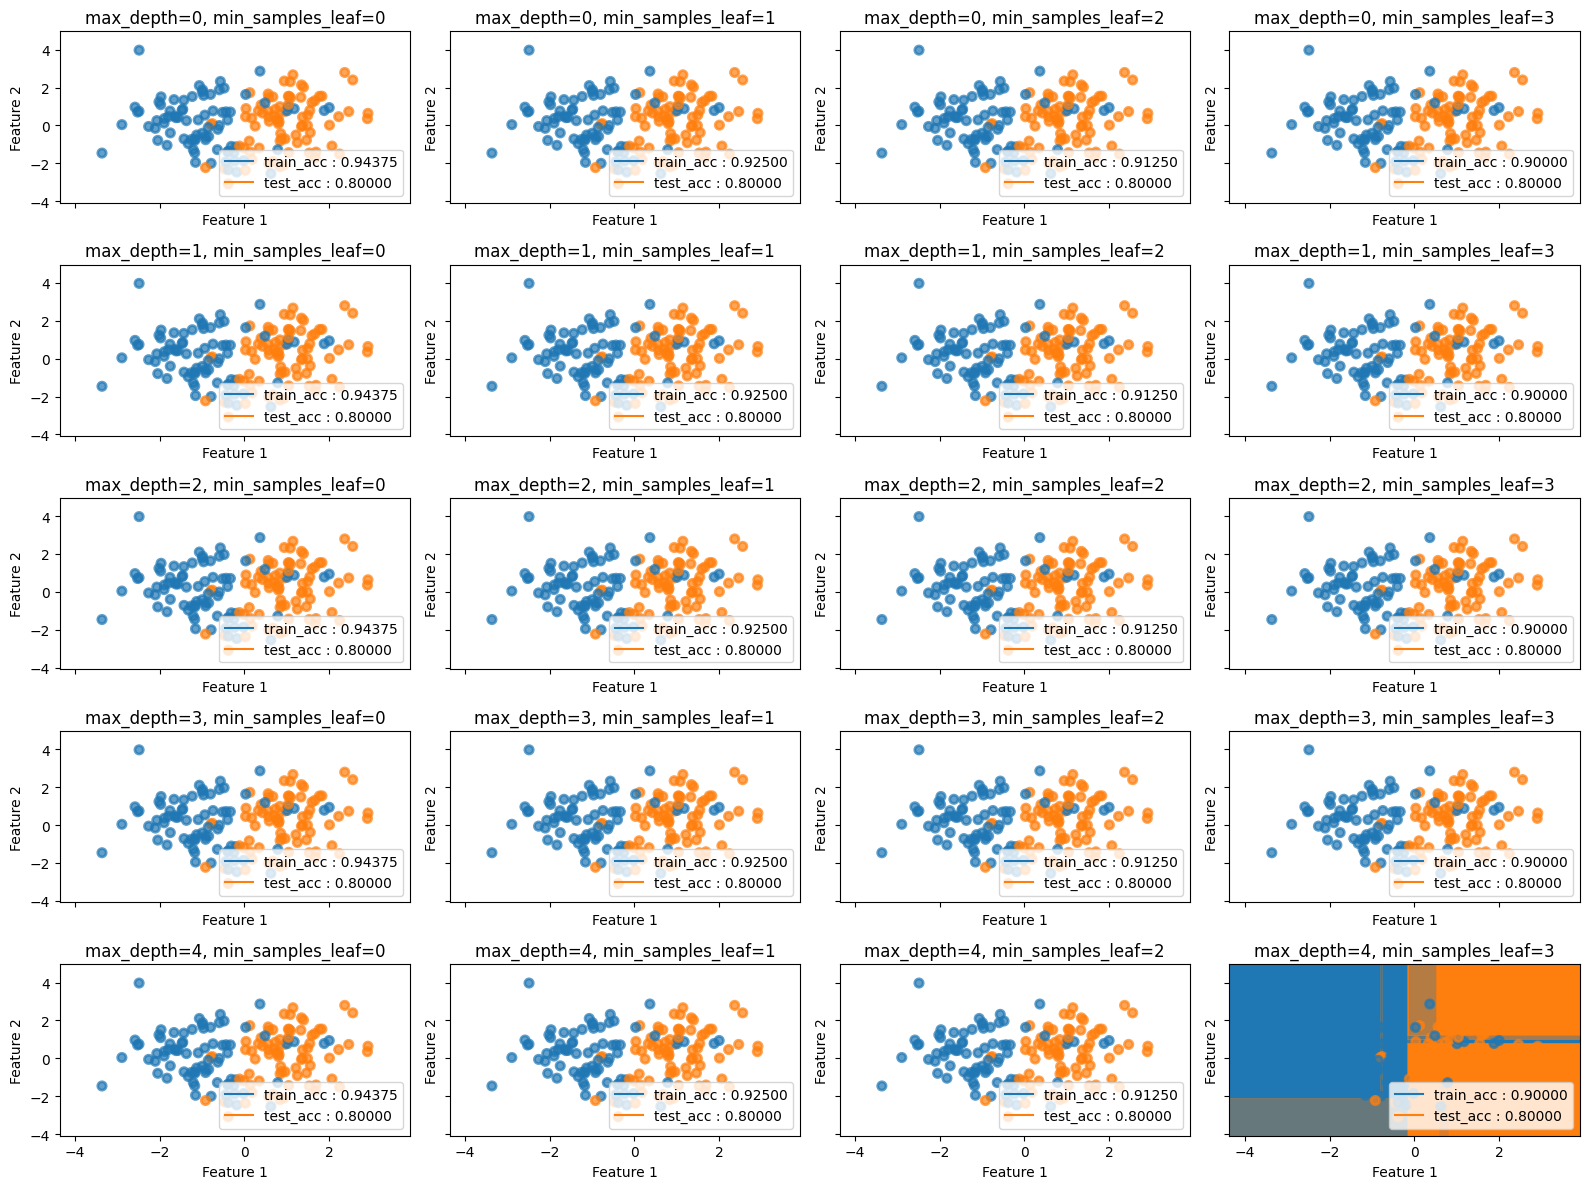

In [32]:
fig, axs = plt.subplots(5, 4, sharex=True, sharey=True,  figsize=(16, 12))


for depth_n, max_depth in enumerate(max_depth_set):

  for sample_n, min_sample in enumerate(min_samples_leaf_set):

    estiamtor = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_sample)
    estiamtor.fit(X_train, y_train)

    acc_train = estiamtor.score(X_train, y_train)
    acc_test = estiamtor.score(X_test, y_test)

    plot_surface_axes(estiamtor, X_train, y_train, axs[depth_n, sample_n], acc_train, acc_test, depth_n, sample_n)


plt.tight_layout()
plt.show()


In [17]:
for i, r in enumerate([22,33,44,55]):
  print(i, r)

0 22
1 33
2 44
3 55


In [10]:
### Your code is here
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('tree',DecisionTreeClassifier())])

grid_params = {
    'tree__min_samples_leaf': min_samples_leaf_set,
    'tree__max_depth': max_depth_set
    }

grid = GridSearchCV(pipe, grid_params)

grid.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('tree', DecisionTreeClassifier())]),
             param_grid={'tree__max_depth': [6, 7, 8, 9, 12],
                         'tree__min_samples_leaf': [3, 5, 7, 10]})

In [ ]:
grid.cv_results_['mean_test_score']

array([0.825  , 0.86875, 0.86875, 0.85625, 0.825  , 0.86875, 0.86875,
       0.85625, 0.825  , 0.86875, 0.86875, 0.85625, 0.825  , 0.86875,
       0.86875, 0.85625, 0.825  , 0.86875, 0.86875, 0.85625])

In [ ]:
grid.cv_results_['params']

[{'tree__max_depth': 6, 'tree__min_samples_leaf': 3},
 {'tree__max_depth': 6, 'tree__min_samples_leaf': 5},
 {'tree__max_depth': 6, 'tree__min_samples_leaf': 7},
 {'tree__max_depth': 6, 'tree__min_samples_leaf': 10},
 {'tree__max_depth': 7, 'tree__min_samples_leaf': 3},
 {'tree__max_depth': 7, 'tree__min_samples_leaf': 5},
 {'tree__max_depth': 7, 'tree__min_samples_leaf': 7},
 {'tree__max_depth': 7, 'tree__min_samples_leaf': 10},
 {'tree__max_depth': 8, 'tree__min_samples_leaf': 3},
 {'tree__max_depth': 8, 'tree__min_samples_leaf': 5},
 {'tree__max_depth': 8, 'tree__min_samples_leaf': 7},
 {'tree__max_depth': 8, 'tree__min_samples_leaf': 10},
 {'tree__max_depth': 9, 'tree__min_samples_leaf': 3},
 {'tree__max_depth': 9, 'tree__min_samples_leaf': 5},
 {'tree__max_depth': 9, 'tree__min_samples_leaf': 7},
 {'tree__max_depth': 9, 'tree__min_samples_leaf': 10},
 {'tree__max_depth': 12, 'tree__min_samples_leaf': 3},
 {'tree__max_depth': 12, 'tree__min_samples_leaf': 5},
 {'tree__max_depth': 1

__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")

    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self

    def transform(self, X, y=None):

        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)

        print("Трансформировали датасет!")
        return X_

In [12]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [13]:
X_train.head()

,x1,x2
0,-0.182557,-2.461648
1,1.883798,0.782433
2,-1.092349,0.287622
3,-1.129710,-0.507833
4,-1.970049,1.507610


In [14]:
from sklearn.pipeline import Pipeline

### Your code is here

pipe = Pipeline([
    ('trans', CustomFunctionTransformer('x1', 'x2', lambda x1, x2: 2*x1 - x2)),
    ('tree', DecisionTreeClassifier(max_depth=3))
    ])

pipe.fit(X_train, y_train)


Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


Pipeline(steps=[('trans',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x7f748ddc0cc0>,
                                           second_col='x2')),
                ('tree', DecisionTreeClassifier(max_depth=3))])

In [15]:
print(pipe.score(X_train, y_train), pipe.score(X_test, y_test))

Трансформировали датасет!
Трансформировали датасет!
0.8625 0.75
